In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
import random
random.seed(0)

In [3]:
df=pd.read_csv("Final.csv", index_col=0)

In [5]:
df.columns

Index(['WIND_SPEED', 'RAIN', 'SNOW', 'SNOW_DEPTH', 'TAVG', 'FOG', 'HEAVY_FOG',
       'THUNDER', 'HAIL', 'GLAZE', 'HAZE', 'BLOWING_SNOW', 'Y', 'HOLIDAY',
       '9E', 'AA', 'AS', 'B6', 'DL', 'EV', 'HA', 'MQ', 'OH', 'OO', 'UA', 'US',
       'VX', 'YX', 'h0', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9',
       'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19',
       'h20', 'h21', 'h22', 'h23', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'],
      dtype='object')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Y', axis=1), df['Y'], test_size=0.25)

In [10]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    #'max_features': [2, 3],
    #'min_samples_leaf': [3, 4, 5],
    #'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [11]:
kfolds = KFold(n_splits = 5)
rf = RandomForestClassifier()


rf_grid_search = GridSearchCV(rf, param_grid, cv = kfolds, scoring = 'roc_auc') 
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [18]:
def plotAUC(truth, pred, lab):
    plt.rcParams["figure.figsize"] = [6,4]
    fpr, tpr, thresholds = roc_curve(truth, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label= lab+' (AUC = %0.2f)' % 0.76)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")

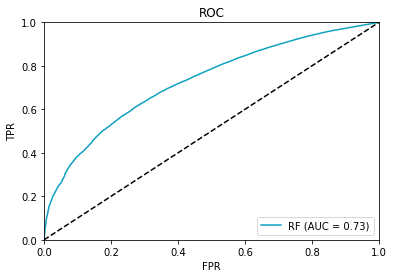

In [12]:
plotAUC(y_test, rf_grid_search.predict_proba(X_test)[:,1], 'RF')

In [13]:
from sklearn.metrics import confusion_matrix,classification_report

y_pred = rf_grid_search.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

print(confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.93      0.89    100966
          1       0.52      0.33      0.40     23976

avg / total       0.79      0.81      0.80    124942

[[93582  7384]
 [16025  7951]]


In [25]:
rf_grid_search.score(X_test, y_test)

0.7671275680912448

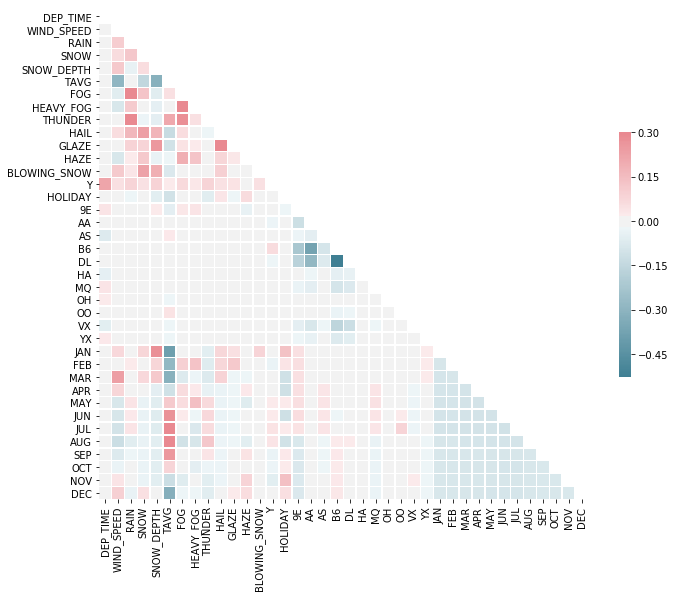

In [28]:
import seaborn as sns
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
7003/(7003+39005)

0.15221265866805772

In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.10%


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [31]:
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.98      0.90     40470
          1       0.73      0.18      0.29      9867

avg / total       0.81      0.83      0.78     50337

[[39824   646]
 [ 8087  1780]]


In [32]:
8087/(8087+39824)

0.16879213541775376

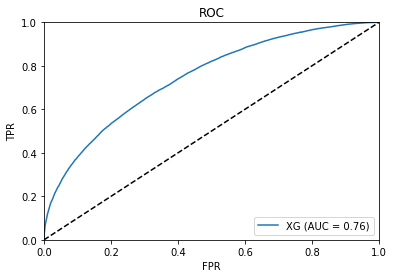

In [19]:
plotAUC(y_test, model.predict_proba(X_test)[:,1], 'XG')

In [34]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }


DTC = DecisionTreeClassifier()

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, cv=5)
grid_search_ABC.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'base_estimator__criterion': ['gini', 'entropy'], 'base_estimator__splitter': ['best', 'random'], 'n_estimators': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

0.8120269384349484
             precision    recall  f1-score   support

          0       0.85      0.93      0.89     40470
          1       0.53      0.32      0.40      9867

avg / total       0.79      0.81      0.79     50337

[[37677  2793]
 [ 6669  3198]]


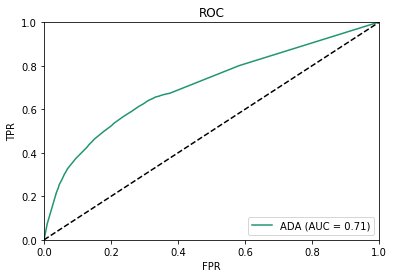

In [36]:
print(grid_search_ABC.score(X_test, y_test))
plotAUC(y_test, grid_search_ABC.predict_proba(X_test)[:,1], 'ADA')
y_pred = grid_search_ABC.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred))